In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
snowfall = pd.read_csv('snowfall.csv')
snowfall.head()

,Country or Territory,Station Name,WMO Station Number,National Station Id Number,Period,Element-Statistic Qualifier Code,Statistic Description,Unit,Jan,Jan Footnotes,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,UNITED STATES OF AMERICA,"BARROW/W. POST W. ROGERS, AK",70026.0,500546.0,1961-1990,NaN,Median Value,cm,4.3,NaN,...,14.0,NaN,6.6,NaN,5.1,NaN,-9999.9,2.0,-9999.9,2.0
1,UNITED STATES OF AMERICA,"KOTZEBUE/RALPH WIEN, AK",70133.0,505076.0,1961-1990,NaN,Median Value,cm,14.2,NaN,...,15.2,NaN,19.0,NaN,16.5,NaN,-9999.9,2.0,-9999.9,2.0
2,UNITED STATES OF AMERICA,BETTLES/FIELD AK,70174.0,500761.0,1961-1990,NaN,Median Value,cm,26.4,NaN,...,28.7,NaN,27.4,NaN,36.3,NaN,-9999.9,2.0,-9999.9,2.0
3,UNITED STATES OF AMERICA,"NOME, AK",70200.0,506496.0,1961-1990,NaN,Median Value,cm,17.3,NaN,...,10.4,NaN,27.4,NaN,22.9,NaN,-9999.9,2.0,-9999.9,2.0
4,UNITED STATES OF AMERICA,"BETHEL/BETHEL AIRPORT, AK",70219.0,500754.0,1961-1990,NaN,Median Value,cm,14.2,NaN,...,9.4,NaN,18.8,NaN,17.3,NaN,-9999.9,2.0,-9999.9,2.0


In [3]:
snow = pd.read_csv('noaa.csv')
snow.head()

,STATION,NAME,DATE,CDSD,EMSN,TAVG
0,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-01,0.0,3.6,19.8
1,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-02,0.0,2.7,23.7
2,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-03,0.0,5.0,39.1
3,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-04,35.0,1.1,53.3
4,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-05,93.0,0.0,62.5


- "CDSD" = Cooling Degree Days (season-to-date). Running total of monthly cooling degree days through the

- "EMSN" = Highest daily snowfall in the year. Given in inches or millimeters depending on user

- "TAVG" = Average Annual Temperature. Computed by adding the unrounded monthly average temperatures and dividing by 12. Given in Celsius or Fahrenheit depending on user specification. Missing if one or more months are missing or flagged.

In [4]:
snow.isnull().sum()

STATION     0
NAME        0
DATE        0
CDSD       60
EMSN        0
TAVG       60
dtype: int64

In [5]:
mean_CDSD = snow['CDSD'].mean()
snow['CDSD'].fillna(value=mean_CDSD, inplace=True)

In [6]:
snow.isnull().sum()

STATION     0
NAME        0
DATE        0
CDSD        0
EMSN        0
TAVG       60
dtype: int64

In [7]:
mean_TAVG = snow['TAVG'].mean()
snow['TAVG'].fillna(value=mean_TAVG, inplace=True)

We need to select rows include DETROIT because it is nearst city to Ann Arbor in our data 

In [8]:
snowfall = snowfall.loc[snowfall['Station Name'] == 'DETROIT/METROPOLITAN ARPT MI']

In [9]:
snowfall

,Country or Territory,Station Name,WMO Station Number,National Station Id Number,Period,Element-Statistic Qualifier Code,Statistic Description,Unit,Jan,Jan Footnotes,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
180,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Median Value,cm,21.6,NaN,...,0.0,NaN,5.6,NaN,25.1,NaN,-9999.9,2.0,-9999.9,2.0
435,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Maximum Daily Value,cm,25.4,NaN,...,6.9,NaN,14.2,NaN,46.7,NaN,-9999.9,2.0,-9999.9,2.0
690,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Date (Year/Day) of Occurrence of Maximum Daily...,cm,198231.0,NaN,...,198919.0,NaN,197727.0,NaN,197401.0,NaN,-9999.0,NaN,-9999.0,NaN
945,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Mean Monthly Value,cm,25.4,NaN,...,0.5,NaN,7.6,NaN,27.7,NaN,106.0,NaN,-9999.9,2.0
1200,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,First Quartile,cm,13.5,NaN,...,0.0,NaN,1.8,NaN,15.2,NaN,-9999.9,2.0,-9999.9,2.0
1455,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Third Quartile,cm,33.8,NaN,...,88888.8,1.0,10.7,NaN,38.9,NaN,-9999.9,2.0,-9999.9,2.0
1711,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Number of Years used to Calculate Normal,cm,30.0,NaN,...,30.0,NaN,30.0,NaN,30.0,NaN,-9999.0,2.0,-9999.9,2.0


In [10]:
snowfall = snowfall.loc[snowfall['Statistic Description'] == 'Maximum Daily Value']
snowfall

,Country or Territory,Station Name,WMO Station Number,National Station Id Number,Period,Element-Statistic Qualifier Code,Statistic Description,Unit,Jan,Jan Footnotes,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
435,UNITED STATES OF AMERICA,DETROIT/METROPOLITAN ARPT MI,72537.0,202103.0,1961-1990,NaN,Maximum Daily Value,cm,25.4,NaN,...,6.9,NaN,14.2,NaN,46.7,NaN,-9999.9,2.0,-9999.9,2.0


In [11]:
Jan = snowfall['Jan'].mean()
Feb = snowfall['Feb'].mean()
Mar = snowfall['Mar'].mean()
Apr = snowfall['Apr'].mean()
May = snowfall['May'].mean()
Jun = snowfall['Jun'].mean()
Jul = snowfall['Jul'].mean()
Aug = snowfall['Aug'].mean()
Sep = snowfall['Sep'].mean()
Oct = snowfall['Oct'].mean()
Nov = snowfall['Nov'].mean()
Dec = snowfall['Dec'].mean()

In [12]:
Ice = pd.DataFrame({'snowfall': [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]})
Ice

,snowfall
0,25.4
1,20.6
2,21.3
3,12.7
4,88888.8
5,0.0
6,0.0
7,0.0
8,0.0
9,6.9


The index 4 is entred wrong so round it

In [13]:
Ice['snowfall'][4] = Ice['snowfall'][4] / 1000

In [14]:
Ice

,snowfall
0,25.4000
1,20.6000
2,21.3000
3,12.7000
4,88.8888
5,0.0000
6,0.0000
7,0.0000
8,0.0000
9,6.9000


We see previsoly that EMSN are given in inches or millimeters depending on user
so we need to convert it to inches 

In [15]:
Ice['snowfall'] = Ice['snowfall']/2.54
Ice

,snowfall
0,10.000000
1,8.110236
2,8.385827
3,5.000000
4,34.995591
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,2.716535


In [16]:
Ice['snowfall'] = np.round(Ice['snowfall'], decimals = 2)
Ice

,snowfall
0,10.00
1,8.11
2,8.39
3,5.00
4,35.00
5,0.00
6,0.00
7,0.00
8,0.00
9,2.72


In [17]:
monthly_emsn = snow.groupby('DATE')['EMSN'].mean()
Jan = monthly_emsn.iloc[0]
Feb = monthly_emsn.iloc[1]
Mar = monthly_emsn.iloc[2]
Apr = monthly_emsn.iloc[3]
May = monthly_emsn.iloc[4]
Jun = monthly_emsn.iloc[5]
Jul = monthly_emsn.iloc[6]
Aug = monthly_emsn.iloc[7]
Sep = monthly_emsn.iloc[8]
Oct = monthly_emsn.iloc[9]
Nov = monthly_emsn.iloc[10]
Dec = monthly_emsn.iloc[11]

In [18]:
Ice['AVG_sn'] = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
Ice

,snowfall,AVG_sn
0,10.00,3.40
1,8.11,2.85
2,8.39,4.75
3,5.00,0.55
4,35.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,2.72,0.00


In [19]:
Ice.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Ice

,snowfall,AVG_sn
Jan,10.00,3.40
Feb,8.11,2.85
Mar,8.39,4.75
Apr,5.00,0.55
May,35.00,0.00
Jun,0.00,0.00
Jul,0.00,0.00
Aug,0.00,0.00
Sep,0.00,0.00
Oct,2.72,0.00


<IPython.core.display.Javascript object>


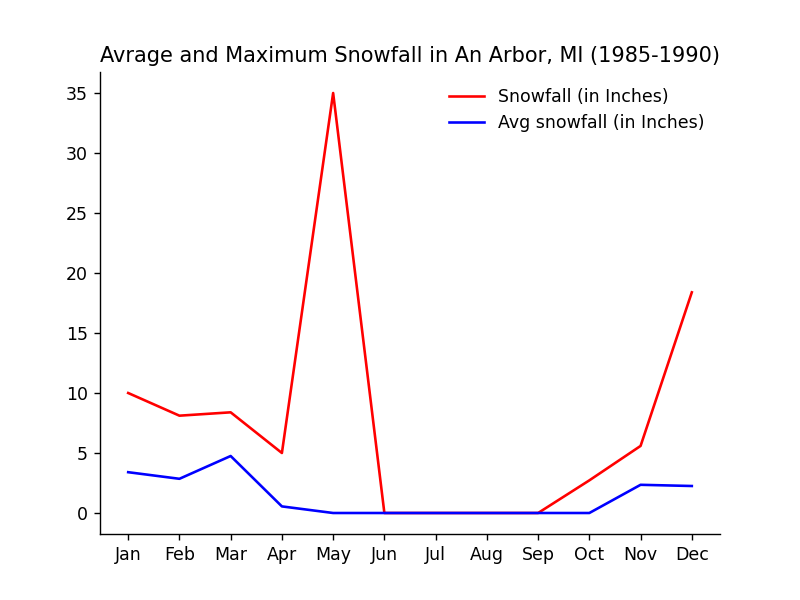

In [20]:
x = Ice.index.tolist()
y1 = Ice['snowfall'].tolist()
y2 = Ice['AVG_sn'].tolist()

plt.plot(x, y1, '-r', label = "Snowfall (in Inches)")
plt.plot(x, y2, '-b', label = "Avg snowfall (in Inches)")

plt.title('Avrage and Maximum Snowfall in An Arbor, MI (1985-1990)')

plt.legend(frameon=False)
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

plt.show()